In [8]:
import numpy.random as rd
from math import *
import matplotlib.pyplot as plt
import ipywidgets as widgets

# Un modèle d'influence d'opinion (Ising à Champ Moyen)

On considère l'évolution de l'opinion de $N\geq 2$
personnes à propos d'une question donnée.

Plus précisément, pour un vecteur $x = (x_1, \ldots, x_N) \in \{-1,+1\}^N$
on interprète $x_i \in \{-1,+1\}$ comme l'opinion de la $i$-ème
personne.

On notera $H(x) := \sum_{k=1}^N x_k$ la "somme des opinions"
et $H_i(x) = \sum_{k\neq i} x_k = H(x) -x_i$ la "somme des opinions observée par la personne $i$".

On considère alors une suite $(X_n)_{n\geq 0}$ de variables aléatoires à valeurs dans $\{-1,+1\}^N$, qui modélise l'évolution de l'opinion des $N$ personnes.
La valeur de $X_0$ est donnée, et on définit $X_n$ de manière récursive:
pour $n\geq 0$, une fois $X_n$ connu,
on définit $X_{n+1}$ en choisissant un individu $i$
au hasard uniformément dans $\{1,\ldots, N\}$ et en changeant la $i$-ème coordonnée de $X_n$ (c'est-à-dire l'opinion de la $i$-ème personne) de manière aléatoire, en la posant égale à:

$\bullet$ $+1$ avec probabilité $\displaystyle \frac{ e^{\beta H_i(X_n) } }{e^{\beta H_i(X_n)} + e^{-\beta H_i(X_n) } }= (1+ e^{-2\beta H_i(X_n)})^{-1}$;

$\bullet$  $-1$ avec probabilité $\displaystyle \frac{e^{-\beta H_i(X_n)}}{e^{\beta H_i(X_n)} + e^{-\beta H_i(X_n) }}= (1+ e^{2\beta H_i(X_n)})^{-1}$.

Dans ces formules, $\beta\geq 0$ est un paramètre qui
mesure "l'influence" de l'opinion $H_i(x)$ des autres personnes sur la personne $i$
(plus $\beta$ est grand, plus la personne $i$ a tendance à s'aligner avec l'opinion majoritaire).

On cherche à comprendre l'évolution de $X_n$, plus particulièrement de l'_opinion générale_
$H(X_n)$, notamment en fonction du paramètre $\beta$.

#### Interprétation en terme de magnétisation: le modèle d'Ising
Cette modélisation permet aussi de décrire un système d'aimants qui peuvent être soit "+" soit "-", et qui peuvent changer de signe de manière aléatoire, mais on quand même tendance à s'aligner avec les autres aimants:
il s'agit du _modèle d'Ising_.
Le paramètre $\beta$ est alors lié à l'inverse de le température (plus la température est élevée, moins l'influence des autres aimants se fait sentir).
L'opinion moyenne $\frac1N H(X_n)$ correspond alors à la magnétisation moyenne du système.

### Programme simulant l'évolution de la suite $H(X_n)$

On commence par écrire un programme qui prend en argument $N\geq 2$ (le nombre de personnes),
le paramètre $\beta >0$ qui mesure la force de l'influence des opinions, et $m \geq 1$ le nombre d'itérations du processus que l'on effectue.

In [2]:
def Chaine(N,beta,m):
    X=[(-1)**i for i in range(N)]
    h=sum(X)
    Y=[h]
    for k in range(m):
        i=rd.randint(0,N)
        h=Y[k]-X[i]
        if rd.random()< 1/(1+exp(-2*beta*h)):
            X[i]=1
            h+=1
        else:
            X[i]=-1
            h-=1
        Y.append(h)
    return Y

In [33]:
Chaine(10,0.5,15)

[0, 2, 2, 2, 0, 0, 2, 4, 4, 4, 4, 6, 6, 6, 6, 6]

## Représentation graphique de l'évolution de l'opinion

On représente maintenant graphiquement l'évolution de l'opinion générale de la population pour $N=25$ individus, pour différents paramètres $\beta$ entre $0,02$ et $0,07$.

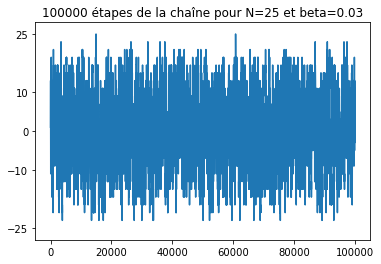

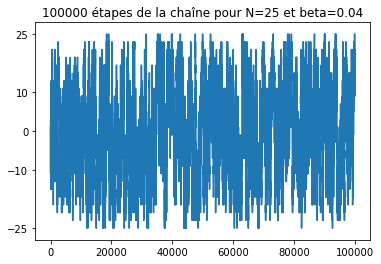

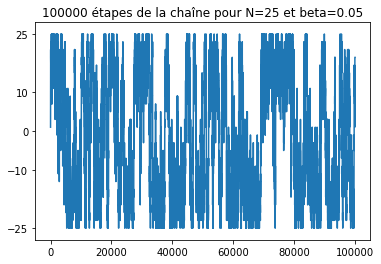

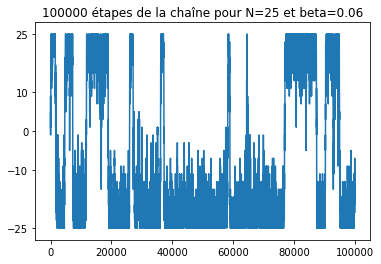

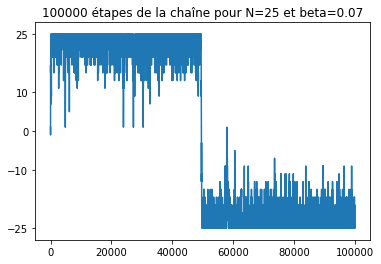

In [4]:
N=25
m=10**5
for beta in [0.03+0.01*i for i in range(5)]:
    plt.axes()
    plt.ylim([-28,28])
    plt.yticks([-25,-10,0,10,25])
    plt.plot(Chaine(N,beta,m))
    plt.title("{} étapes de la chaîne pour N={} et beta={}".format(m,N,beta))
    plt.show()

Pour $\beta = 0,02$ et $\beta =0,03$,
l'opinion générale $H(X_n)$ semble osciller autour de $0$, c'est-à-dire qu'une majorité claire ne semble jamais se dégager (comme si les personnes choisissaient leur opinion indépendamment des autres).

Pour $\beta = 0,06$ et $\beta =0,07$,
l'opinion générale $H(X_n)$ semble avoir une majorité claire de $+1$ ou de $-1$
et passer de temps en temps d'un cas à l'autre, de façon aléatoire.

## Transition de phase et méta-stabilité

Il s'avère qu'il y a une _transition de phase_ pour le comportement de $H(X_n)$, autour de $\beta \sim 1/N$:

$\bullet$ Si $\beta = \frac{a}{N}$ avec $a<1$ (et $N$ est grand), alors les individus se comportent pratiquement comme s'ils ne ressentaient pas l'influence de l'opinion des autres: l'opinion moyenne (la magnétisation moyenne) $\frac1N H(X_n)$ reste proche de $0$.

$\bullet$ Si $\beta = \frac{a}{N}$ avec $a>1$ (et $N$ est grand), alors les individus sont très influencés par les opinions des autres: l'opinion moyenne (la magnétisation moyenne) $\frac1N H(X_n)$ est soit très proche de $+1$ soit très proche de $-1$, et passe de temps en temps de l'un à l'autre. Ce phénomène est appelé _méta-stabilité_, et est observé par exemple dans le champ magnétique terrestre.

Ci-dessous, une illustration avec $N=100$ de ce phénomène: d'une part pour $\beta = \frac{a}{N}$ avec $a=0.7<1$,
d'autre part pour $\beta = \frac{a}{N}$ avec $a=1.3 >1$ (on observe bien le phénomène de méta-stabilité).


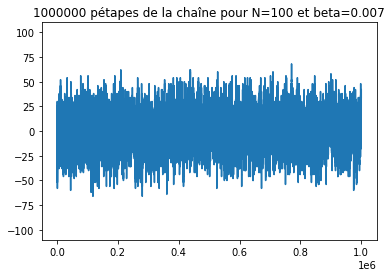

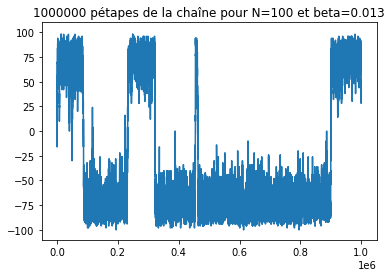

In [34]:
N=100
m=10**6
for beta in [0.007,0.013]:
    C=Chaine(N,beta,m)
    plt.axes()
    plt.ylim([-1.1*N,1.1*N])
    plt.yticks([-100,-75,-50,-25,0,25,50,75,100])
    plt.plot(C)
    plt.title("{} étapes de la chaîne pour N={} et beta={}".format(m,N,beta))
    plt.show()

## Évolution temporelle de l'opinion générale

Ci-dessous deux programmes pour voir évoluer l'opinion génégrale $H(X_n)$ en fonction du temps. 

In [30]:
N=25
m=25*10**3
beta=0.02
C1=Chaine(N,beta,m)

def Film1(t):
    plt.axes()
    plt.ylim([-28,28])
    plt.yticks([-25,-10,0,10,25])
    plt.plot(C1[:t])
    plt.show()

wid1= widgets.Play(value=0,min=0,max=m,step=100,description="Press play",disabled=False)
widgets.interact(Film1, t=wid1)

interactive(children=(Play(value=0, description='Press play', max=25000, step=100), Output()), _dom_classes=('…

<function __main__.Film1(t)>

In [ ]:
N=25
m=25*10**3
beta=0.06
C2=Chaine(N,beta,m)

def Film2(t):
    plt.axes()
    plt.ylim([-28,28])
    plt.yticks([-25,-10,0,10,25])
    plt.plot(C2[:t])
    plt.show()
    
wid2= widgets.Play(value=0,min=0,max=m,step=100,description="Press play",disabled=False)
widgets.interact(Film2, t=wid2)